In [1]:
import numpy as np
import pandas as pd

from graph_tool.all import *

In [2]:
a2q = pd.read_csv('data/a2q_6month.csv')

In [3]:
# Start date is 2008-08-01
a2q = a2q.loc[a2q['time'] < '2009-02-01']

In [4]:
edges = pd.DataFrame()
edges['source'] = a2q['source']
edges['target'] = a2q['target']
# Remove any links to itself
edges = edges.loc[edges['source'] != edges['target']]

In [5]:
g = Graph(directed=False)
vmap = g.add_edge_list(edges.values, hashed=True)

In [6]:
# Girvan-Newman Algorithm
# tmp_edges = edges
# tmp_g = Graph(directed=False)
# tmp_g.add_edge_list(tmp_edges.values, hashed=True)
# dendogram = np.zeros(len(tmp_edges))
# j = 0
# while (j < len(tmp_edges)):
#     # Calculate betweenness
#     vertex_betweenness, edge_betweenness = betweenness(tmp_g)
#     # Construct array of edge betweenness storing max as we go
#     l = np.zeros(len(tmp_edges))
#     i = 0
#     max_edge = None
#     max_edge_betweenness = 0
#     for e in tmp_g.edges():
#         l[i] = edge_betweenness[e]
#         if (l[i] > max_edge_betweenness):
#             max_edge_betweenness = l[i]
#             max_edge = e
#         i += 1
#     # Remove and store the edge with highest betweenness
#     tmp_g.remove_edge(max_edge)
#     dendogram.append(max_edge)
#     print(j)
#     j+=1

In [7]:
# Fit a nested-SBM community detection with fixed seed
np.random.seed(111)
state2 = minimize_nested_blockmodel_dl(g)

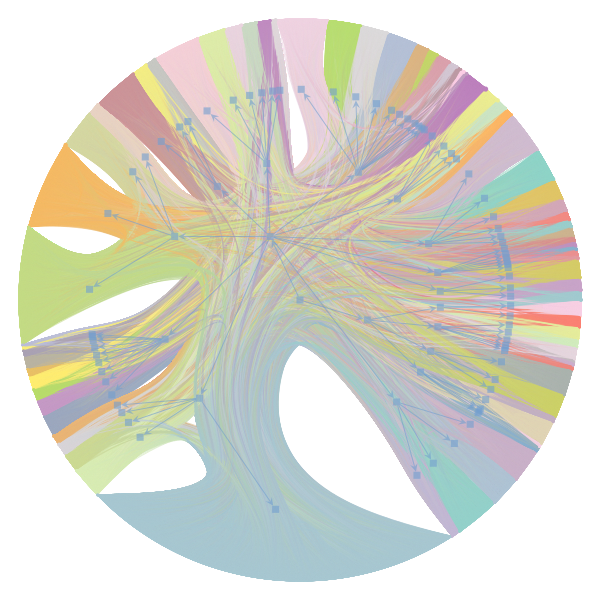

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f5868dc4518, at 0x7f58687c7710>,
 <Graph object, directed, with 22045 vertices and 22044 edges at 0x7f5868dc4978>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f5868dc4978, at 0x7f5868dc4d68>)

In [8]:
state2.draw()

In [9]:
state2.print_summary()

l: 0, N: 21951, B: 76
l: 1, N: 76, B: 15
l: 2, N: 15, B: 2
l: 3, N: 2, B: 1


In [1]:
l_1 = state2.levels[1]
b = l_1.get_blocks()

communities = [b[v] for v in g.vertices()] 
largest_community = np.argmax(np.bincount(communities))
largest_community

NameError: name 'state2' is not defined

In [10]:
l_0 = state2.levels[0]
b = l_0.get_blocks()

communities = [b[v] for v in g.vertices()] 
largest_community = np.argmax(np.bincount(communities))
largest_community

4

In [11]:
np.bincount(communities)

array([ 416,  563,   90,  124, 4811,  396,  384,   23,  110,  430,  153,
        175,   43,   70,  121,  149,   49,   61,  583,   57,   89,  270,
         32,   40,   32,  337,  147,  121,  162,  121,   99, 1126,  106,
        265,  242,  287,  137,  157,  425, 1477,  226,  486,  310,  157,
        596,   63,  190,   49,  643,  221,  156,  339,  166,   68,  104,
        546,   44,  154,  205,  173,  304,   68,   30,   70,   35,  130,
        191,  146,  103,  399,  344,  145,  207,  195,   51,  157])

In [12]:
np.bincount(communities)[largest_community]

4811

In [13]:
# Map graph index to actual vertex
index_to_vertex_map = {i: vmap[i] for i in range(g.num_vertices())}

In [14]:
# Get vertices in largest community
verts = []
for i in range(len(communities)):
    if (communities[i] == largest_community):
        vertex = index_to_vertex_map[i]
        verts.append(vertex)

In [15]:
np.savetxt("data/vertices_seed111.csv", verts, delimiter=',')